In [512]:

import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [513]:
transactions_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/transactions_data.csv')
cards_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/cards_data.csv')
users_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/users_data.csv')
print(cards_data.head(5))
print(users_data.head(5))
print(transactions_data.head(5))

     id  client_id  card_brand        card_type       card_number  expires  \
0  4524        825        Visa            Debit  4344676511950444  12/2022   
1  2731        825        Visa            Debit  4956965974959986  12/2020   
2  3701        825        Visa            Debit  4582313478255491  02/2024   
3    42        825        Visa           Credit  4879494103069057  08/2024   
4  4659        825  Mastercard  Debit (Prepaid)  5722874738736011  03/2009   

   cvv has_chip  num_cards_issued credit_limit acct_open_date  \
0  623      YES                 2       $24295        09/2002   
1  393      YES                 2       $21968        04/2014   
2  719      YES                 2       $46414        07/2003   
3  693       NO                 1       $12400        01/2003   
4   75      YES                 1          $28        09/2008   

   year_pin_last_changed card_on_dark_web  
0                   2008               No  
1                   2014               No  
2       

In [514]:
#Đọc file json 
#with open('/Users/thekiet/Downloads/Personal_project_data/train_fraud_labels.json') as f:
    #fraud_data = json.load(f)
with open('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.json') as f:
    mcc_data = json.load(f)

In [515]:
#chuyển file json sang df
#fraud_df = pd.DataFrame((fraud_data))
#print(fraud_df.head())

mcc_df = pd.DataFrame(list(mcc_data.items()), columns=['MCC_Code', 'Description'])
print(mcc_df.head())


  MCC_Code                           Description
0     5812         Eating Places and Restaurants
1     5541                      Service Stations
2     7996  Amusement Parks, Carnivals, Circuses
3     5411          Grocery Stores, Supermarkets
4     4784                 Tolls and Bridge Fees


In [516]:
# Reset index để chuyển index thành cột id
#fraud_df_reset = fraud_df.reset_index()
#fraud_df_reset.columns = ['index', 'target']
# Chuyển file json sang csv
#fraud_df.to_csv('/Users/thekiet/Downloads/Personal_project_data/fraud_labels.csv', index=False)
mcc_df.to_csv('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.csv', index=False)

In [517]:
mcc_codes = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.csv')
print(mcc_codes.head())
#fraud_labels = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/fraud_labels.csv')
#print(fraud_labels.head())



   MCC_Code                           Description
0      5812         Eating Places and Restaurants
1      5541                      Service Stations
2      7996  Amusement Parks, Carnivals, Circuses
3      5411          Grocery Stores, Supermarkets
4      4784                 Tolls and Bridge Fees


In [518]:
#Kiểm tra NA 
print(transactions_data.isna().sum())
print(users_data.isna().sum())
print(cards_data.isna().sum())
print(mcc_codes.isna().sum())


id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64
id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64
id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card

In [519]:
#Xử lý NA
transactions_data['merchant_state'] = transactions_data['merchant_state'].fillna("Unknow")
transactions_data['errors'] = transactions_data['errors'].fillna("NO")
#Kiểm tra lại NA
print(transactions_data.isna().sum())

id                      0
date                    0
client_id               0
card_id                 0
amount                  0
use_chip                0
merchant_id             0
merchant_city           0
merchant_state          0
zip               1652706
mcc                     0
errors                  0
dtype: int64


In [520]:
#Xoá các cột không dùng đến
transactions_data = transactions_data.drop(columns=[
    'merchant_city',
    'zip',
    'errors'])
users_data = users_data.drop(columns=[
    'retirement_age',
    'birth_year',
    'birth_month',
    'address',
    'latitude',
    'longitude',
    'num_credit_cards'])
cards_data = cards_data.drop(columns=[
    'year_pin_last_changed',
    'card_on_dark_web',
    'acct_open_date'])

#Check lại các dataframe
print(transactions_data.head(5))
print(users_data.head(5))
print(cards_data.head(5))

        id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_state   mcc  
0  Swipe Transaction        59935             ND  5499  
1  Swipe Transaction        67570             IA  5311  
2  Swipe Transaction        27092             CA  4829  
3  Swipe Transaction        27092             IN  4829  
4  Swipe Transaction        13051             MD  5813  
     id  current_age  gender per_capita_income yearly_income total_debt  \
0   825           53  Female            $29278        $59696    $127613   
1  1746           53  Female            $37891        $77254    $191349   
2  1718           81  Female            $22681  

In [521]:
# Chuẩn hoá kiểu dữ liệu cho ngày tháng, giá trị giao dịch, thu nhập năm
transactions_data['date'] = pd.to_datetime(transactions_data['date'])
      # convert to datetime
transactions_data['amount'] = (
    transactions_data['amount']
    .str.replace('$', '', regex=False)  # Xóa ký hiệu $
    .str.replace(',', '', regex=False)   # Xóa dấu phân cách nghìn (nếu có)
    .apply(pd.to_numeric)
)

users_data['yearly_income'] = (
    users_data['yearly_income']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip() 
    .apply(pd.to_numeric)
)

In [522]:
#Kiểm tra tổng số mặt hàng đã được giao dịch 
unique_descriptions = mcc_df['Description'].unique()
print(unique_descriptions)
print(f"Tổng số giá trị unique: {len(unique_descriptions)}")

['Eating Places and Restaurants' 'Service Stations'
 'Amusement Parks, Carnivals, Circuses' 'Grocery Stores, Supermarkets'
 'Tolls and Bridge Fees' 'Utilities - Electric, Gas, Water, Sanitary'
 'Book Stores' 'Fast Food Restaurants' 'Money Transfer'
 'Department Stores' 'Lumber and Building Materials' 'Discount Stores'
 'Computer Network Services' 'Miscellaneous Food Stores'
 'Taxicabs and Limousines' 'Wholesale Clubs'
 'Miscellaneous Home Furnishing Stores' 'Motion Picture Theaters'
 'Drinking Places (Alcoholic Beverages)' 'Telecommunication Services'
 'Shoe Stores' 'Cosmetic Stores' 'Medical Services'
 'Automotive Service Shops' 'Drug Stores and Pharmacies'
 'Local and Suburban Commuter Transportation'
 'Digital Goods - Media, Books, Apps' 'Dentists and Orthodontists'
 'Package Stores, Beer, Wine, Liquor'
 'Sports Apparel, Riding Apparel Stores' 'Beauty and Barber Shops'
 'Miscellaneous Metalwork' 'Theatrical Producers' 'Passenger Railways'
 'Family Clothing Stores'
 'Cable, Satellite

In [523]:
# Tạo map gán tên ngành hàng vào mỗi giao dịch nhằm phân loại giao dịch theo ngành hàng
mcc_map = dict(zip(mcc_codes['MCC_Code'].astype(str), mcc_codes['Description'])) # tạo từ điển đối chiếu mã -> tên
transactions_data['mcc'] = transactions_data['mcc'].astype(str) #chuyển đổi mã mcc là text
transactions_data['Description'] = transactions_data['mcc'].map(mcc_map) 

# Tạo nhóm category lớn, loại outliner category 
def categorize_into_groups(description):
    if pd.isna(description):
        return 'Other'
    
    description_lower = description.lower()
    
    # 1. Ăn uống & Nhà hàng
    if any(keyword in description_lower for keyword in ['restaurant', 'eating', 'food', 'fast food', 'drinking', 'bar', 'cafe']):
        return 'Food & Dining'
    
    # 2. Mua sắm & Bán lẻ
    elif any(keyword in description_lower for keyword in ['store', 'shop', 'department', 'discount', 'wholesale', 'retail', 'clothing', 'shoe', 'cosmetic', 'furniture', 'electronics', 'hardware', 'sporting', 'appliance', 'gift', 'music', 'book', 'florist']):
        return 'Shopping & Retail'
    
    # 3. Dịch vụ cá nhân & Sức khỏe
    elif any(keyword in description_lower for keyword in ['medical', 'doctor', 'dentist', 'hospital', 'chiropractor', 'podiatrist', 'beauty', 'barber', 'laundry', 'cleaning', 'legal', 'insurance', 'accounting', 'tax']):
        return 'Personal Services & Healthcare'
    
    # 4. Du lịch & Giải trí
    elif any(keyword in description_lower for keyword in ['travel', 'hotel', 'motel', 'resort', 'lodging', 'airline', 'cruise', 'railroad', 'railway', 'bus', 'transportation', 'amusement', 'park', 'theater', 'sports', 'recreational', 'betting', 'casino']):
        return 'Travel & Entertainment'
    
    # 5. Xăng dầu & Giao thông
    elif any(keyword in description_lower for keyword in ['service station', 'gas', 'fuel', 'toll', 'bridge', 'trucking', 'freight', 'towing', 'automotive', 'car wash']):
        return 'Fuel & Transportation'
    
    # 6. Tiện ích & Dịch vụ gia đình
    elif any(keyword in description_lower for keyword in ['utility', 'electric', 'gas', 'water', 'sanitary', 'telecommunication', 'cable', 'satellite', 'tv', 'heating', 'plumbing', 'air conditioning']):
        return 'Utilities & Home Services'
    
    # 7. Mặt hàng công nghệ
    elif any(keyword in description_lower for keyword in ['computer', 'network', 'digital', 'electronic', 'semiconductor', 'software', 'app', 'game']):
        return 'Technology & Digital Goods'
    
    # 8. Vật liệu & Xây dựng
    elif any(keyword in description_lower for keyword in ['lumber', 'building', 'material', 'metal', 'steel', 'iron', 'welding', 'fabrication', 'machinery', 'industrial', 'tool']):
        return 'Construction & Industrial'
    
    # 9. Dịch vụ tài chính
    elif any(keyword in description_lower for keyword in ['money transfer', 'bank', 'financial', 'payment']):
        return 'Financial Services'
    
    # 10. Khác
    else:
        return 'Other'

# Áp dụng phân loại mới cho các mặt hàng 
transactions_data['category_group'] = transactions_data['Description'].apply(categorize_into_groups)

print("Số lượng các mặt hàng theo phân loại mới:")
print(transactions_data['category_group'].value_counts())



Số lượng các mặt hàng theo phân loại mới:
category_group
Shopping & Retail                 4956955
Food & Dining                     3326931
Fuel & Transportation             2481774
Personal Services & Healthcare     741552
Financial Services                 589140
Travel & Entertainment             406378
Utilities & Home Services          284509
Construction & Industrial          269889
Other                              212905
Technology & Digital Goods          35882
Name: count, dtype: int64


In [524]:
#Tạo cột năm quan sát thay đổi
transactions_data['year'] = transactions_data['date'].dt.year

#Tạo cột tổng chi tiêu, loại ra các giao dịch tiền vào:
transactions_data['spend'] = 0
transactions_data['is_spend'] = transactions_data['amount'] < 0
# Chỉ gán giá trị cho những dòng là chi tiêu
transactions_data.loc[transactions_data['is_spend'], 'spend'] = transactions_data['amount'].abs()
# Kiểm tra lại độ dài dữ liệu chi tiêu 
len(transactions_data['spend'])


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/3344063041.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[77. 64. 78. ... 52. 77. 78.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transactions_data.loc[transactions_data['is_spend'], 'spend'] = transactions_data['amount'].abs()


13305915

In [525]:
# Nhóm dữ liệu, mỗi khách hàng mỗi năm chi bao nhiêu, giao dịch bao nhiêu lần

agg_client_year = transactions_data.groupby(['client_id', 'year']).agg(
    total_spent=('spend', 'sum'),  # tính tổng chi tiêu
    total_transactions=('id', 'count'),  # số lượng giao dịch
    group_spent=('spend', 'sum')
).reset_index()

#Chia tổng chi tiêu thành nhóm, chủ yếu (0-10k)
spent_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000, 20000, float('inf')]
labels = ['0-500', '500-1,000', '1,000-1,500', '1,500-2,000', '2,000-2,500', '2,500-3,000', '3,000-5,000', '5,000-10,000', '10,000-20,000', '20,000+']
agg_client_year['group_spent'] = pd.cut(
    agg_client_year['group_spent'], 
    bins=spent_bins, 
    labels=labels, 
    right=False
)

In [526]:
# Tìm xem mỗi khách hàng chi nhiều tiền nhất cho ngành hàng nào
cat_sum = (
    transactions_data[transactions_data['is_spend']]  # Chỉ lấy giao dịch chi tiêu
    .groupby(['client_id', 'year', 'category_group'])  # Nhóm theo khách hàng, năm, nhóm ngành hàng
    .agg(category_spend=('spend', 'sum'))  # Tính tổng chi cho mỗi ngành
    .reset_index()
)

# Sắp xếp để tìm nhóm ngành hàng chi nhiều nhất
cat_sum = cat_sum.sort_values(['client_id', 'year', 'category_spend'], ascending=[True, True, False])

# Lấy nhóm ngành hàng chi nhiều nhất của mỗi khách hàng
top_cat = cat_sum.groupby(['client_id', 'year']).first().reset_index()[['client_id', 'year', 'category_group']]
top_cat = top_cat.rename(columns={'category_group': 'top_category'})

In [527]:
# Tìm xem khách hàng dùng loại thẻ nào nhiều nhất (credit/debit)
type_cards = transactions_data.merge(cards_data[['id', 'card_type']], left_on='card_id', right_on='id', how='left')

card_group = (
    type_cards[type_cards['is_spend']]  # Chỉ xét chi tiêu
    .groupby(['client_id', 'year', 'card_type'])  # Nhóm theo khách hàng, năm, loại thẻ
    .agg(card_spend=('spend', 'sum'))  # Tổng chi tiêu bằng mỗi loại thẻ
    .reset_index()
)

# Sắp xếp để tìm thẻ được dùng nhiều nhất
card_group = card_group.sort_values(['client_id', 'year', 'card_spend'], ascending=[True, True, False])

# Lấy thẻ chính của mỗi khách hàng
primary_card = card_group.groupby(['client_id', 'year']).first().reset_index()[['client_id', 'year', 'card_type']]

In [529]:
# Kết hợp tất cả thông tin thành 1 bảng duy nhất
client_df = (
    agg_client_year  # Tổng chi tiêu
    .merge(top_cat, on=['client_id', 'year'], how='left')  # Thêm ngành hàng yêu thích
    .merge(primary_card, on=['client_id', 'year'], how='left')  # Thêm loại thẻ chính
    .merge(
        users_data[['id', 'gender', 'yearly_income', 'credit_score', 'current_age']]
        .rename(columns={'id': 'client_id'}),
        on='client_id',
        how='left'
    )  # Thêm thông tin nhân khẩu học
)

In [530]:
# Phân nhóm tuổi cho dễ phân tích
age_bins = [0, 24, 34, 44, 54, 64, 190]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
client_df['age_group'] = pd.cut(client_df['current_age'], bins=age_bins, labels=labels, right=True)

# Gộp nhóm thu nhập       
income_bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
income_labels = [
    '<25000', 
    '25000–50000', 
    '50000–75000', 
    '75000–100000', 
    '100000–150000', 
    '150000+'
]
client_df['yearly_income'] = pd.cut(client_df['yearly_income'], bins=income_bins, labels=income_labels, right=False)

# Chọn các cột quan trọng cho phân tích
final_client_df = client_df[[
    'client_id', 'gender', 'age_group', 'yearly_income', 'credit_score',
    'card_type', 'total_spent', 'total_transactions', 'year', 'top_category', 'group_spent'
]]
print(final_client_df)

       client_id gender age_group yearly_income  credit_score  \
0              0   Male     25-34   50000–75000           763   
1              0   Male     25-34   50000–75000           763   
2              0   Male     25-34   50000–75000           763   
3              0   Male     25-34   50000–75000           763   
4              0   Male     25-34   50000–75000           763   
...          ...    ...       ...           ...           ...   
11898       1998   Male       65+        <25000           688   
11899       1998   Male       65+        <25000           688   
11900       1998   Male       65+        <25000           688   
11901       1998   Male       65+        <25000           688   
11902       1998   Male       65+        <25000           688   

             card_type  total_spent  total_transactions  year  \
0               Credit       5703.0                1113  2010   
1               Credit      10174.0                1330  2011   
2               Credit  

In [531]:
print("10 NHÓM CATEGORY MỚI:")
print(final_client_df['top_category'].value_counts())
print("\n")
print(final_client_df.head())

10 NHÓM CATEGORY MỚI:
top_category
Food & Dining                 4676
Fuel & Transportation         3818
Travel & Entertainment        1670
Construction & Industrial     1162
Other                          297
Technology & Digital Goods     162
Utilities & Home Services       38
Name: count, dtype: int64


   client_id gender age_group yearly_income  credit_score card_type  \
0          0   Male     25-34   50000–75000           763    Credit   
1          0   Male     25-34   50000–75000           763    Credit   
2          0   Male     25-34   50000–75000           763    Credit   
3          0   Male     25-34   50000–75000           763    Credit   
4          0   Male     25-34   50000–75000           763     Debit   

   total_spent  total_transactions  year           top_category    group_spent  
0       5703.0                1113  2010          Food & Dining   5,000-10,000  
1      10174.0                1330  2011  Fuel & Transportation  10,000-20,000  
2       6549.0        

In [ ]:
# Export final_client_df ra CSV
final_client_df.to_csv('/Users/thekiet/Downloads/Personal_project_data/final_client_df.csv', index=False)
print("Đã lưu final_client_df.csv vào thư mục project")
print(f"Số dòng: {len(final_client_df)}")
print(f"Số cột: {len(final_client_df.columns)}")


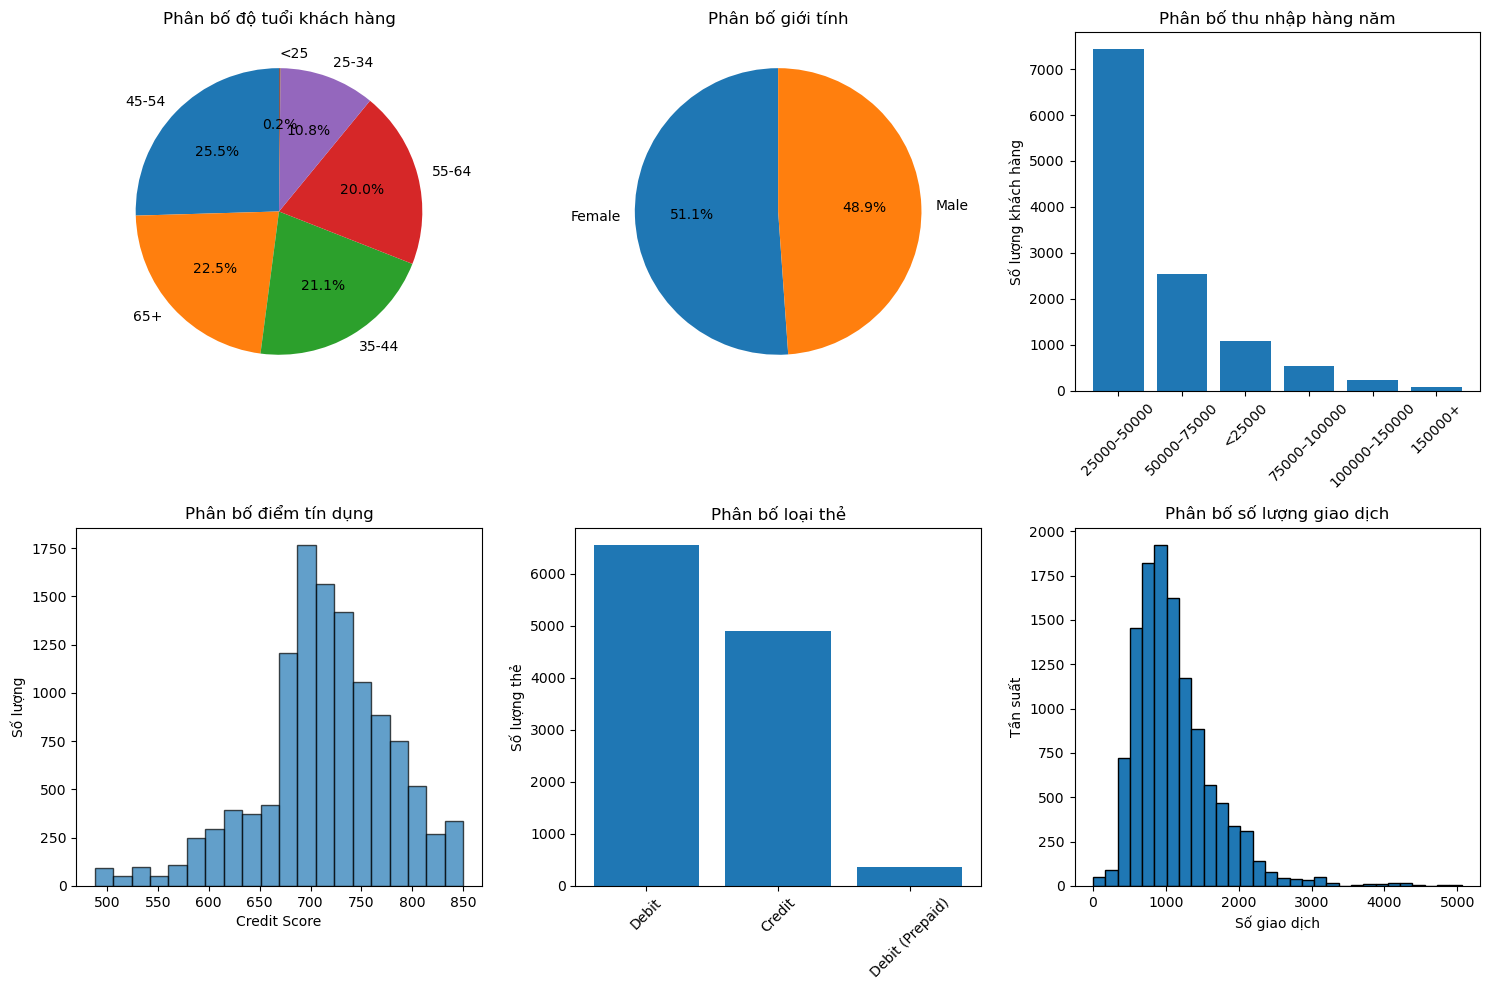

In [532]:

# 1. Phân bố nhân khẩu học
plt.figure(figsize=(15, 10))

# Phân bố độ tuổi
plt.subplot(2, 3, 1)
age_dist = final_client_df['age_group'].value_counts()
plt.pie(age_dist.values, labels=age_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố độ tuổi khách hàng')
# Phân bố giới tính
plt.subplot(2, 3, 2)
gender_dist = final_client_df['gender'].value_counts()
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố giới tính')

# Phân bố thu nhập
plt.subplot(2, 3, 3)
income_dist = final_client_df['yearly_income'].value_counts()
plt.bar(range(len(income_dist)), income_dist.values)
plt.title('Phân bố thu nhập hàng năm')
plt.xticks(range(len(income_dist)), income_dist.index, rotation=45)
plt.ylabel('Số lượng khách hàng')

# Phân bố điểm tín dụng
plt.subplot(2, 3, 4)
plt.hist(final_client_df['credit_score'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Phân bố điểm tín dụng')
plt.xlabel('Credit Score')
plt.ylabel('Số lượng')

# Phân bố loại thẻ
plt.subplot(2, 3, 5)
card_dist = final_client_df['card_type'].value_counts()
plt.bar(range(len(card_dist)), card_dist.values)
plt.title('Phân bố loại thẻ')
plt.xticks(range(len(card_dist)), card_dist.index, rotation=45)
plt.ylabel('Số lượng thẻ')

# Phân bố số giao dịch
plt.subplot(2, 3, 6)
plt.hist(final_client_df['total_transactions'], bins=30, edgecolor='black')
plt.title('Phân bố số lượng giao dịch')
plt.xlabel('Số giao dịch')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

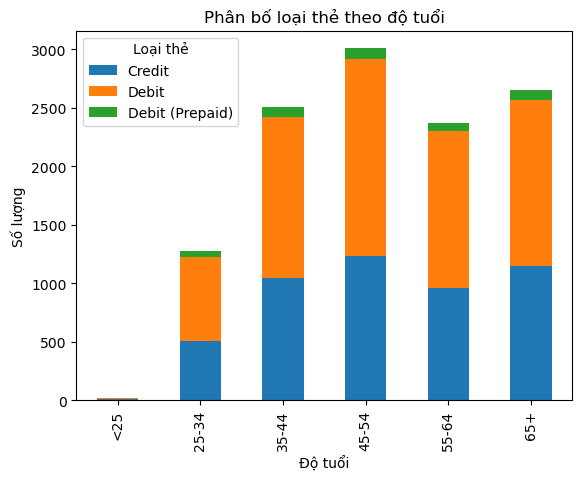

In [533]:
# 3. Phân bố loại thẻ theo độ tuổi
plt.figure(figsize=(12, 6))
card_age = pd.crosstab(final_client_df['age_group'], final_client_df['card_type'])
card_age.plot(kind='bar', stacked=True)
plt.title('Phân bố loại thẻ theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.legend(title='Loại thẻ')
plt.show()

<Figure size 1400x1000 with 0 Axes>

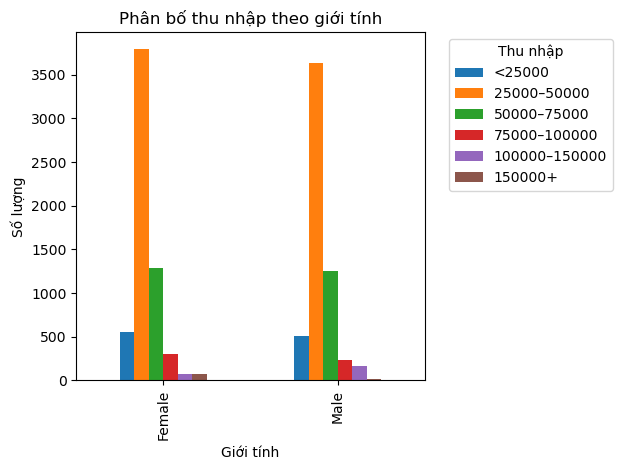

In [534]:
# 6. Phân bố thu nhập theo giới tính

plt.figure(figsize=(14, 10))
gender_income = pd.crosstab(final_client_df['gender'], final_client_df['yearly_income'])
gender_income.plot(kind='bar')
plt.title('Phân bố thu nhập theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(title='Thu nhập', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/3902368407.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_spent = final_client_df.groupby(['gender', 'age_group'])['total_spent'].mean().unstack()


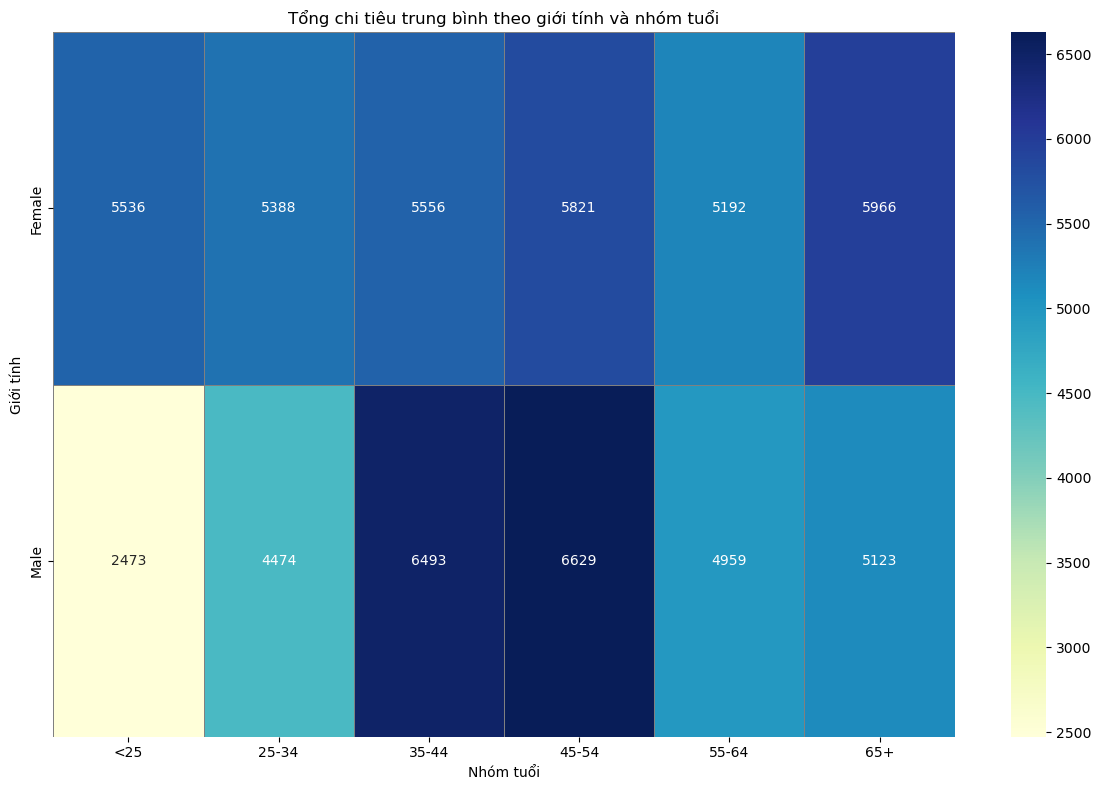

In [535]:
plt.figure(figsize=(12, 8))

# Sử dụng heatmap vẽ mối quan hệ về tổng chi tiêu trung bình giữa giới tính và nhóm tuổi
gender_spent = final_client_df.groupby(['gender', 'age_group'])['total_spent'].mean().unstack()

sns.heatmap(gender_spent, annot=True, fmt='.0f',cmap='YlGnBu', 
            linewidths=0.5, linecolor='gray')
plt.title('Tổng chi tiêu trung bình theo giới tính và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Giới tính')
plt.tight_layout()
plt.show()

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/933534264.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_spent = final_client_df.groupby(['card_type', 'age_group'])['total_spent'].mean().unstack()


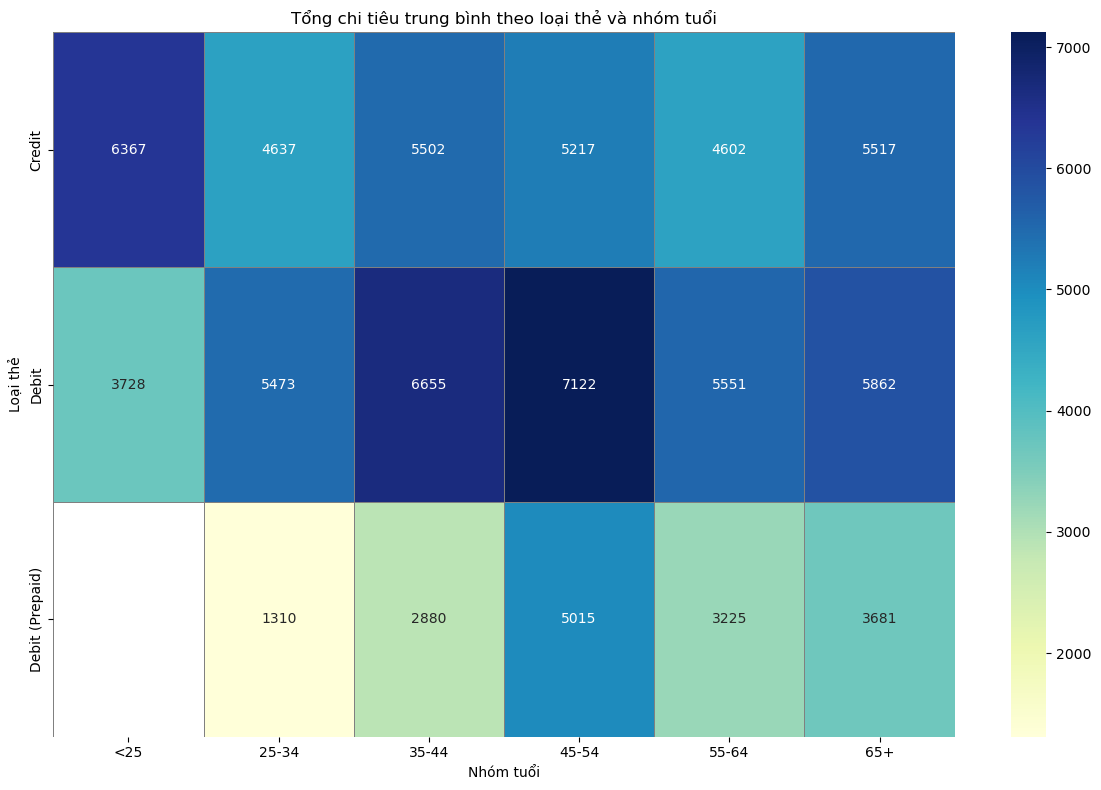

In [536]:
#Heatmap mối quan hệ chi tiêu trung bình theo loại thẻ và nhóm tuổi
plt.figure(figsize=(12, 8))

# Sử dụng heatmap
card_spent = final_client_df.groupby(['card_type', 'age_group'])['total_spent'].mean().unstack()

sns.heatmap(card_spent, annot=True, fmt='.0f',cmap='YlGnBu', 
            linewidths=0.5, linecolor='gray')
plt.title('Tổng chi tiêu trung bình theo loại thẻ và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Loại thẻ')
plt.tight_layout()
plt.show()

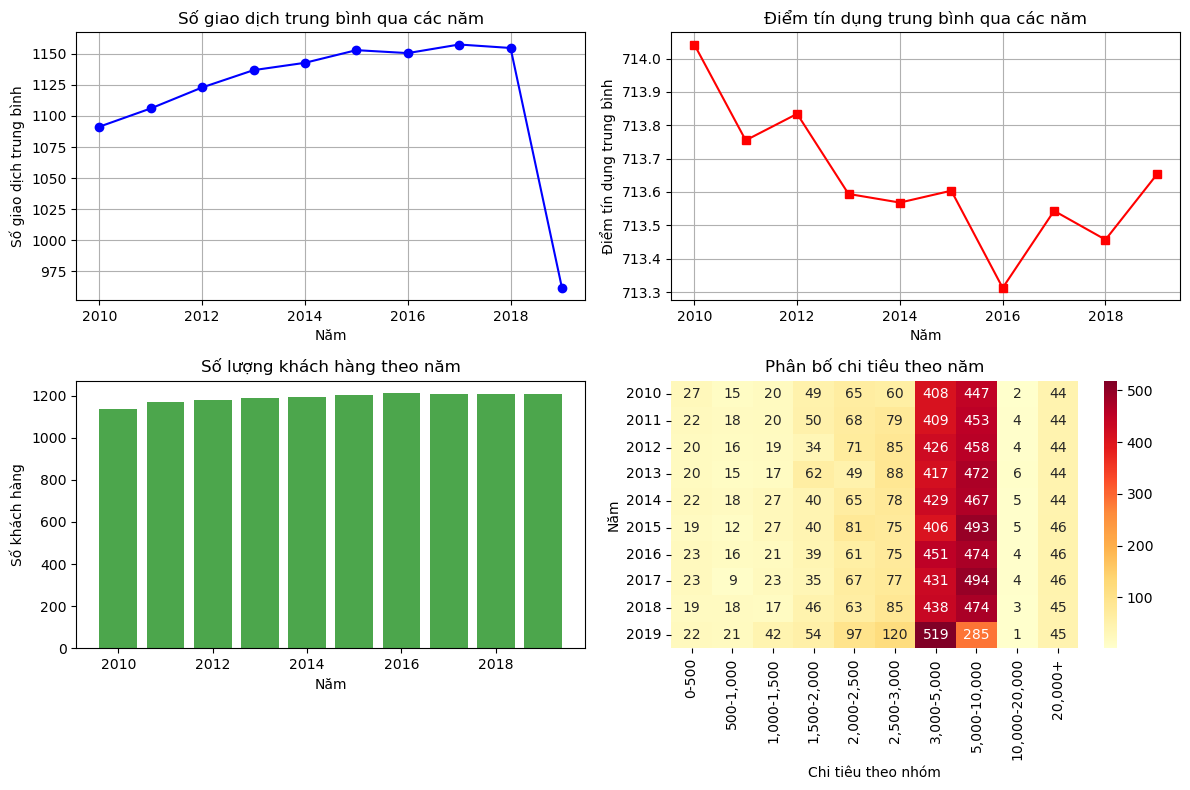

In [537]:
# 4. Xu hướng tổng thể qua các năm
plt.figure(figsize=(12, 8))

# Số giao dịch trung bình theo năm
plt.subplot(2, 2, 1)
yearly_transactions = final_client_df.groupby('year')['total_transactions'].mean()
plt.plot(yearly_transactions.index, yearly_transactions.values, marker='o', color='blue')
plt.title('Số giao dịch trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Số giao dịch trung bình')
plt.grid(True)

# Điểm tín dụng trung bình theo năm
plt.subplot(2, 2, 2)
yearly_credit = final_client_df.groupby('year')['credit_score'].mean()
plt.plot(yearly_credit.index, yearly_credit.values, marker='s', color='red')
plt.title('Điểm tín dụng trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Điểm tín dụng trung bình')
plt.grid(True)

# Số lượng khách hàng theo năm
plt.subplot(2, 2, 3)
yearly_clients = final_client_df.groupby('year')['client_id'].nunique()
plt.bar(yearly_clients.index, yearly_clients.values, color='green', alpha=0.7)
plt.title('Số lượng khách hàng theo năm')
plt.xlabel('Năm')
plt.ylabel('Số khách hàng')

# Phân bố chi tiêu theo năm
plt.subplot(2, 2, 4)
yearly_spent = pd.crosstab(final_client_df['year'], final_client_df['group_spent'])
sns.heatmap(yearly_spent, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Phân bố chi tiêu theo năm')
plt.xlabel('Chi tiêu theo nhóm')
plt.ylabel('Năm')

plt.tight_layout()
plt.show()

In [ ]:
#_____Hết_EDA_________

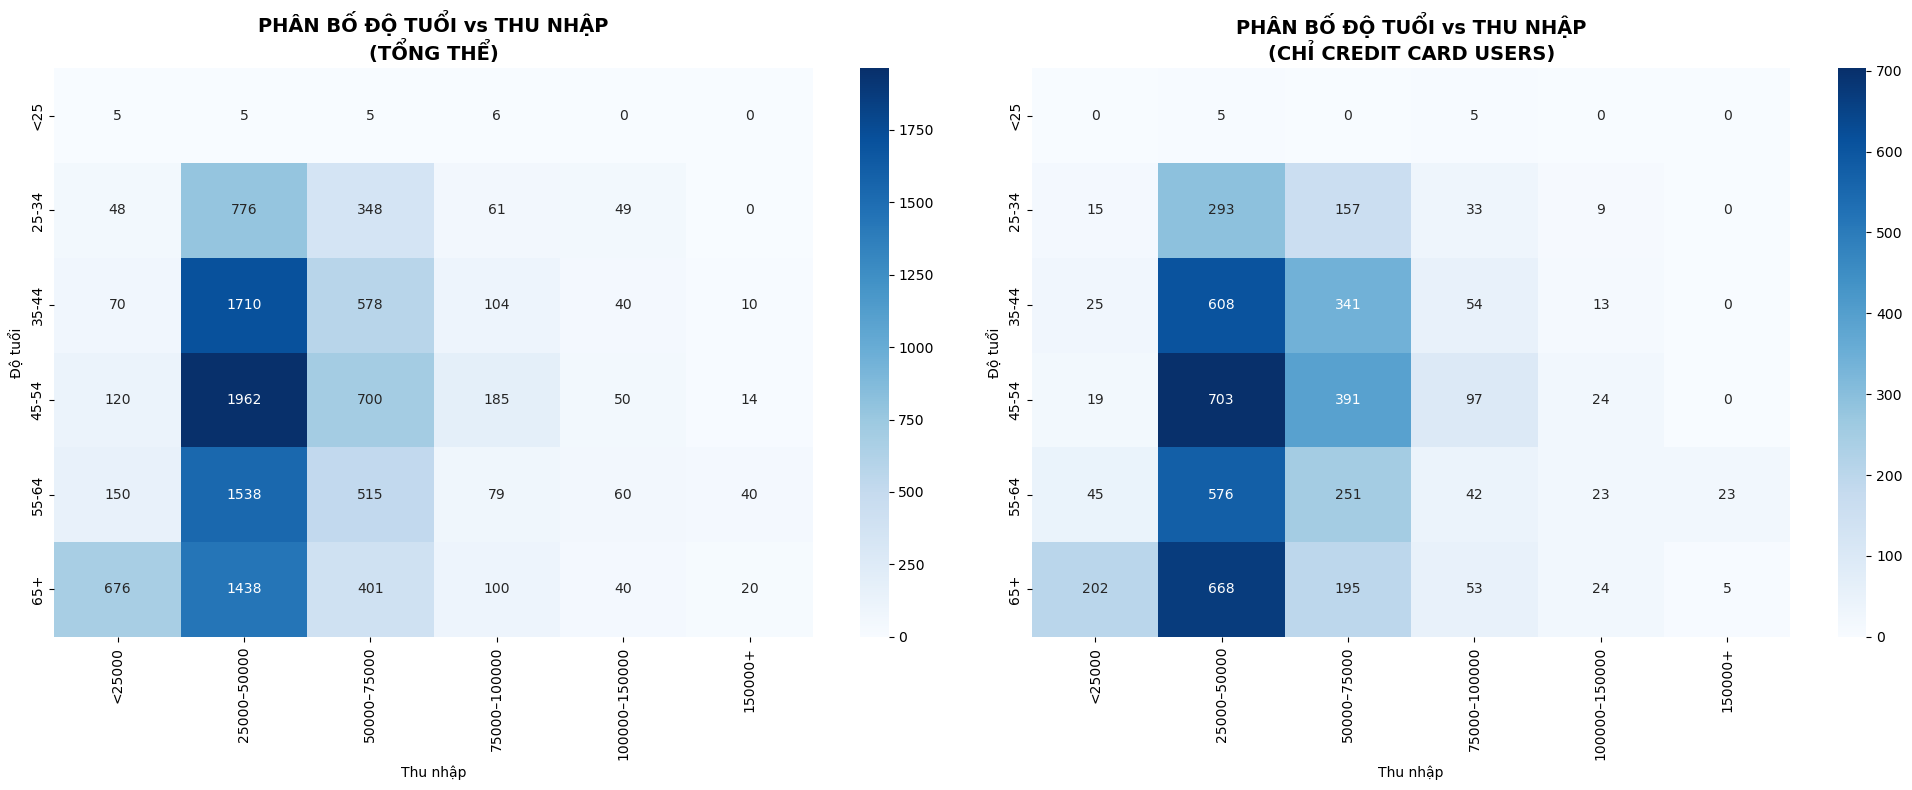

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/511130104.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_credit_all = final_client_df.groupby(['age_group', 'yearly_income'])['credit_score'].mean().unstack()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/511130104.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_credit_only = credit_card_users.groupby(['age_group', 'yearly_income'])['credit_score'].mean().unstack()


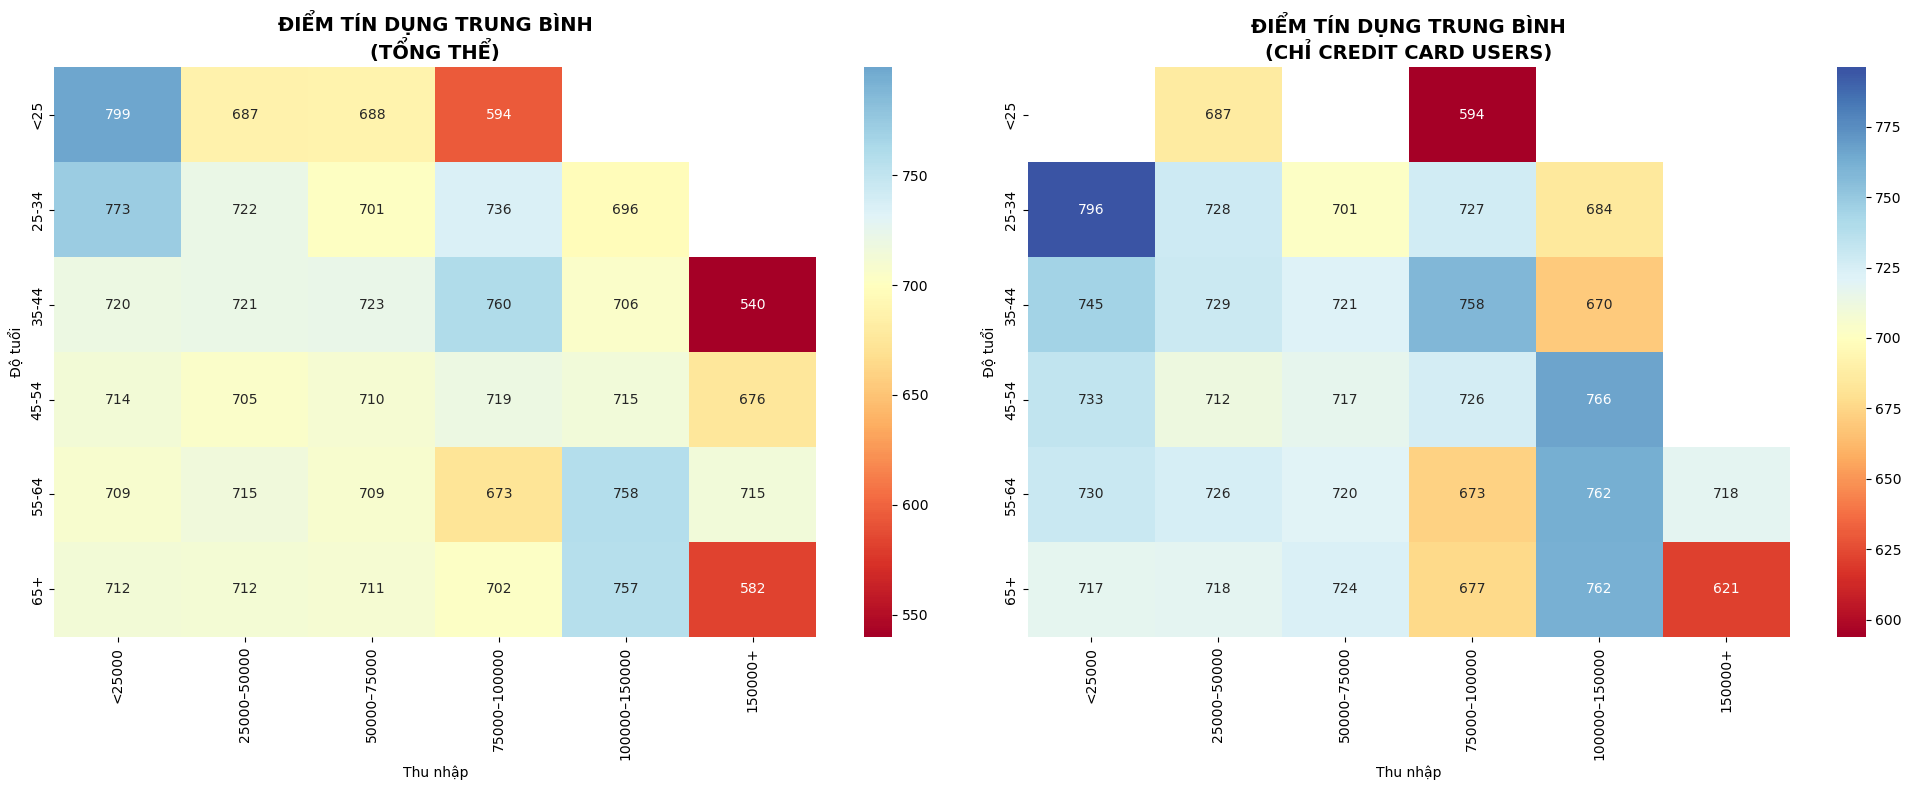

In [542]:
# Tạo dataset cho credit card users
credit_card_users = final_client_df[final_client_df['card_type'] == 'Credit']

# 1. SO SÁNH PHÂN BỐ ĐỘ TUỔI VS THU NHẬP
plt.figure(figsize=(20, 8))

# Tổng thể
plt.subplot(1, 2, 1)
age_income_all = pd.crosstab(final_client_df['age_group'], final_client_df['yearly_income'])
sns.heatmap(age_income_all, annot=True, cmap='Blues', fmt='d')
plt.title('PHÂN BỐ ĐỘ TUỔI vs THU NHẬP\n(TỔNG THỂ)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Chỉ credit card users
plt.subplot(1, 2, 2)
age_income_credit = pd.crosstab(credit_card_users['age_group'], credit_card_users['yearly_income'])
sns.heatmap(age_income_credit, annot=True, cmap='Blues', fmt='d')
plt.title('PHÂN BỐ ĐỘ TUỔI vs THU NHẬP\n(CHỈ CREDIT CARD USERS)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

plt.tight_layout()
plt.show()

# 2. SO SÁNH ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI VÀ THU NHẬP
plt.figure(figsize=(20, 8))

# Tổng thể
plt.subplot(1, 2, 1)
age_income_credit_all = final_client_df.groupby(['age_group', 'yearly_income'])['credit_score'].mean().unstack()
sns.heatmap(age_income_credit_all, annot=True, cmap='RdYlBu', fmt='.0f', center=700)
plt.title('ĐIỂM TÍN DỤNG TRUNG BÌNH\n(TỔNG THỂ)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Chỉ credit card users
plt.subplot(1, 2, 2)
age_income_credit_only = credit_card_users.groupby(['age_group', 'yearly_income'])['credit_score'].mean().unstack()
sns.heatmap(age_income_credit_only, annot=True, cmap='RdYlBu', fmt='.0f', center=700)
plt.title('ĐIỂM TÍN DỤNG TRUNG BÌNH\n(CHỈ CREDIT CARD USERS)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

plt.tight_layout()
plt.show()



/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/4184603273.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spent_all = final_client_df.groupby('age_group')['total_spent'].mean()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/4184603273.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spent_credit = credit_card_users.groupby('age_group')['total_spent'].mean()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/4184603273.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

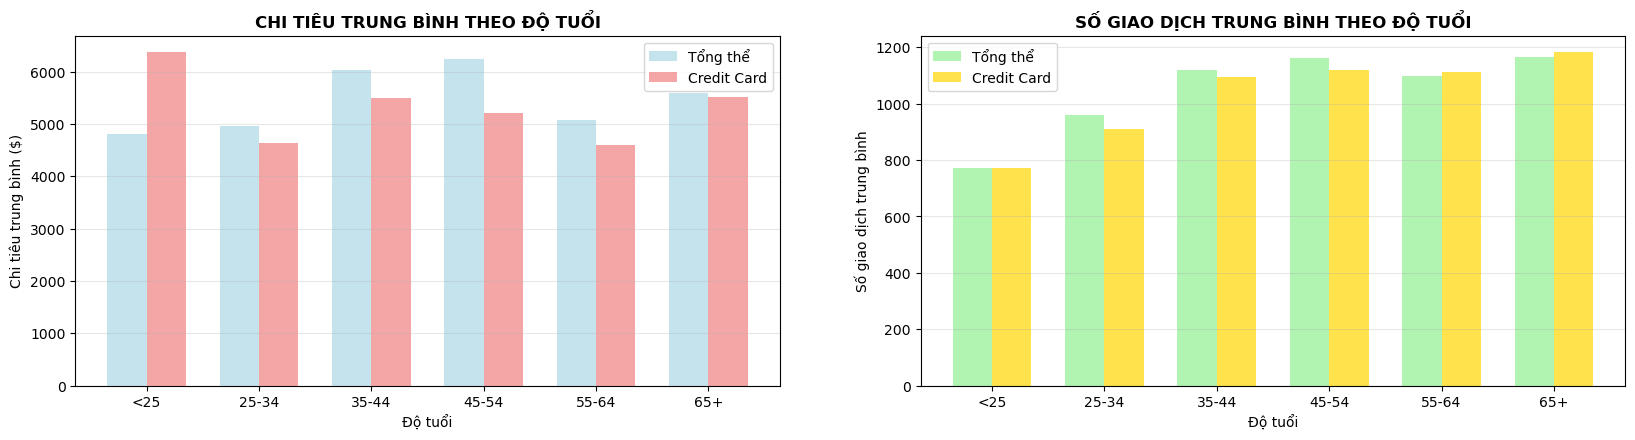

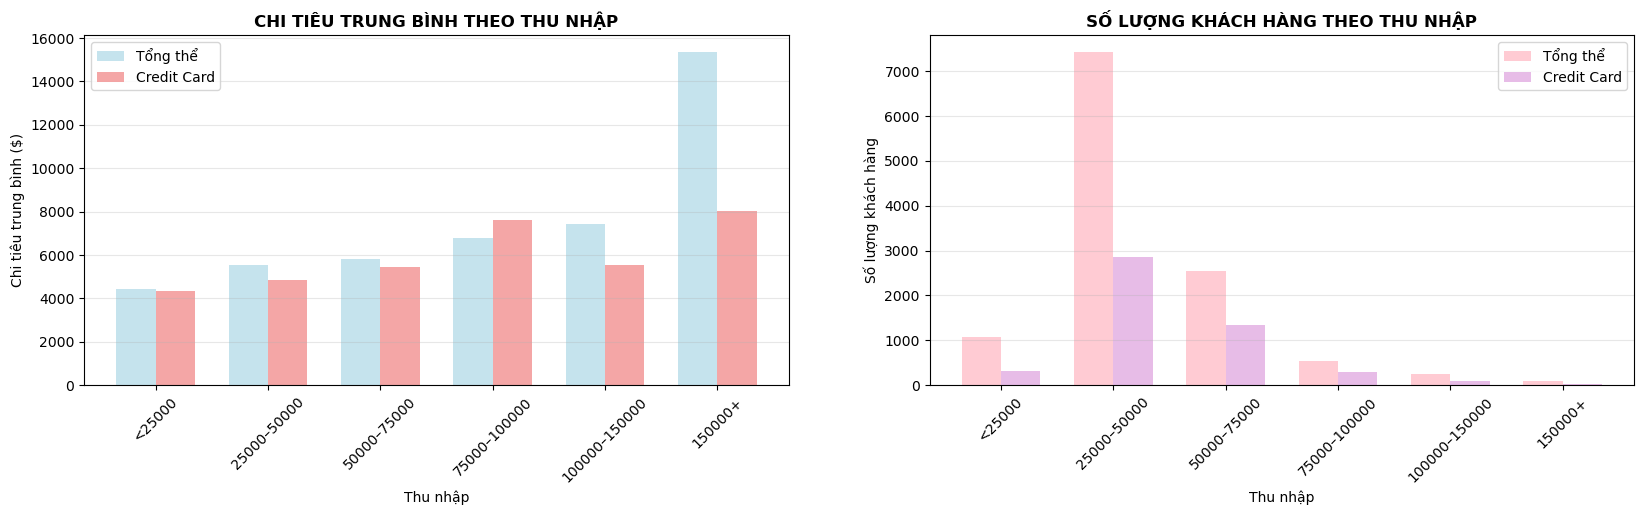

In [543]:
# 3. SO SÁNH CHI TIÊU VÀ GIAO DỊCH THEO ĐỘ TUỔI
plt.figure(figsize=(20, 10))

# Chi tiêu trung bình
plt.subplot(2, 2, 1)
age_spent_all = final_client_df.groupby('age_group')['total_spent'].mean()
age_spent_credit = credit_card_users.groupby('age_group')['total_spent'].mean()

x = np.arange(len(age_spent_all.index))
width = 0.35

plt.bar(x - width/2, age_spent_all.values, width, label='Tổng thể', alpha=0.7, color='lightblue')
plt.bar(x + width/2, age_spent_credit.values, width, label='Credit Card', alpha=0.7, color='lightcoral')
plt.title('CHI TIÊU TRUNG BÌNH THEO ĐỘ TUỔI', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Chi tiêu trung bình ($)')
plt.xticks(x, age_spent_all.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Số giao dịch trung bình
plt.subplot(2, 2, 2)
age_trans_all = final_client_df.groupby('age_group')['total_transactions'].mean()
age_trans_credit = credit_card_users.groupby('age_group')['total_transactions'].mean()

plt.bar(x - width/2, age_trans_all.values, width, label='Tổng thể', alpha=0.7, color='lightgreen')
plt.bar(x + width/2, age_trans_credit.values, width, label='Credit Card', alpha=0.7, color='gold')
plt.title('SỐ GIAO DỊCH TRUNG BÌNH THEO ĐỘ TUỔI', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Số giao dịch trung bình')
plt.xticks(x, age_trans_all.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 4. SO SÁNH THEO THU NHẬP
plt.figure(figsize=(20, 10))

# Chi tiêu theo thu nhập
plt.subplot(2, 2, 1)
income_spent_all = final_client_df.groupby('yearly_income')['total_spent'].mean()
income_spent_credit = credit_card_users.groupby('yearly_income')['total_spent'].mean()

x_income = np.arange(len(income_spent_all.index))
width_income = 0.35

plt.bar(x_income - width_income/2, income_spent_all.values, width_income, label='Tổng thể', alpha=0.7, color='lightblue')
plt.bar(x_income + width_income/2, income_spent_credit.values, width_income, label='Credit Card', alpha=0.7, color='lightcoral')
plt.title('CHI TIÊU TRUNG BÌNH THEO THU NHẬP', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Chi tiêu trung bình ($)')
plt.xticks(x_income, income_spent_all.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Số lượng theo thu nhập
plt.subplot(2, 2, 2)
income_count_all = final_client_df.groupby('yearly_income').size()
income_count_credit = credit_card_users.groupby('yearly_income').size()

plt.bar(x_income - width_income/2, income_count_all.values, width_income, label='Tổng thể', alpha=0.7, color='lightpink')
plt.bar(x_income + width_income/2, income_count_credit.values, width_income, label='Credit Card', alpha=0.7, color='plum')
plt.title('SỐ LƯỢNG KHÁCH HÀNG THEO THU NHẬP', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Số lượng khách hàng')
plt.xticks(x_income, income_count_all.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/1618479318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_users['credit_score_group'] = credit_card_users['credit_score'].apply(categorize_credit_score)


SO SÁNH TỔNG THỂ vs CREDIT CARD USERS
Tổng số khách hàng: 11,903
Số credit card users: 4,899
Tỷ lệ credit card users: 41.2%




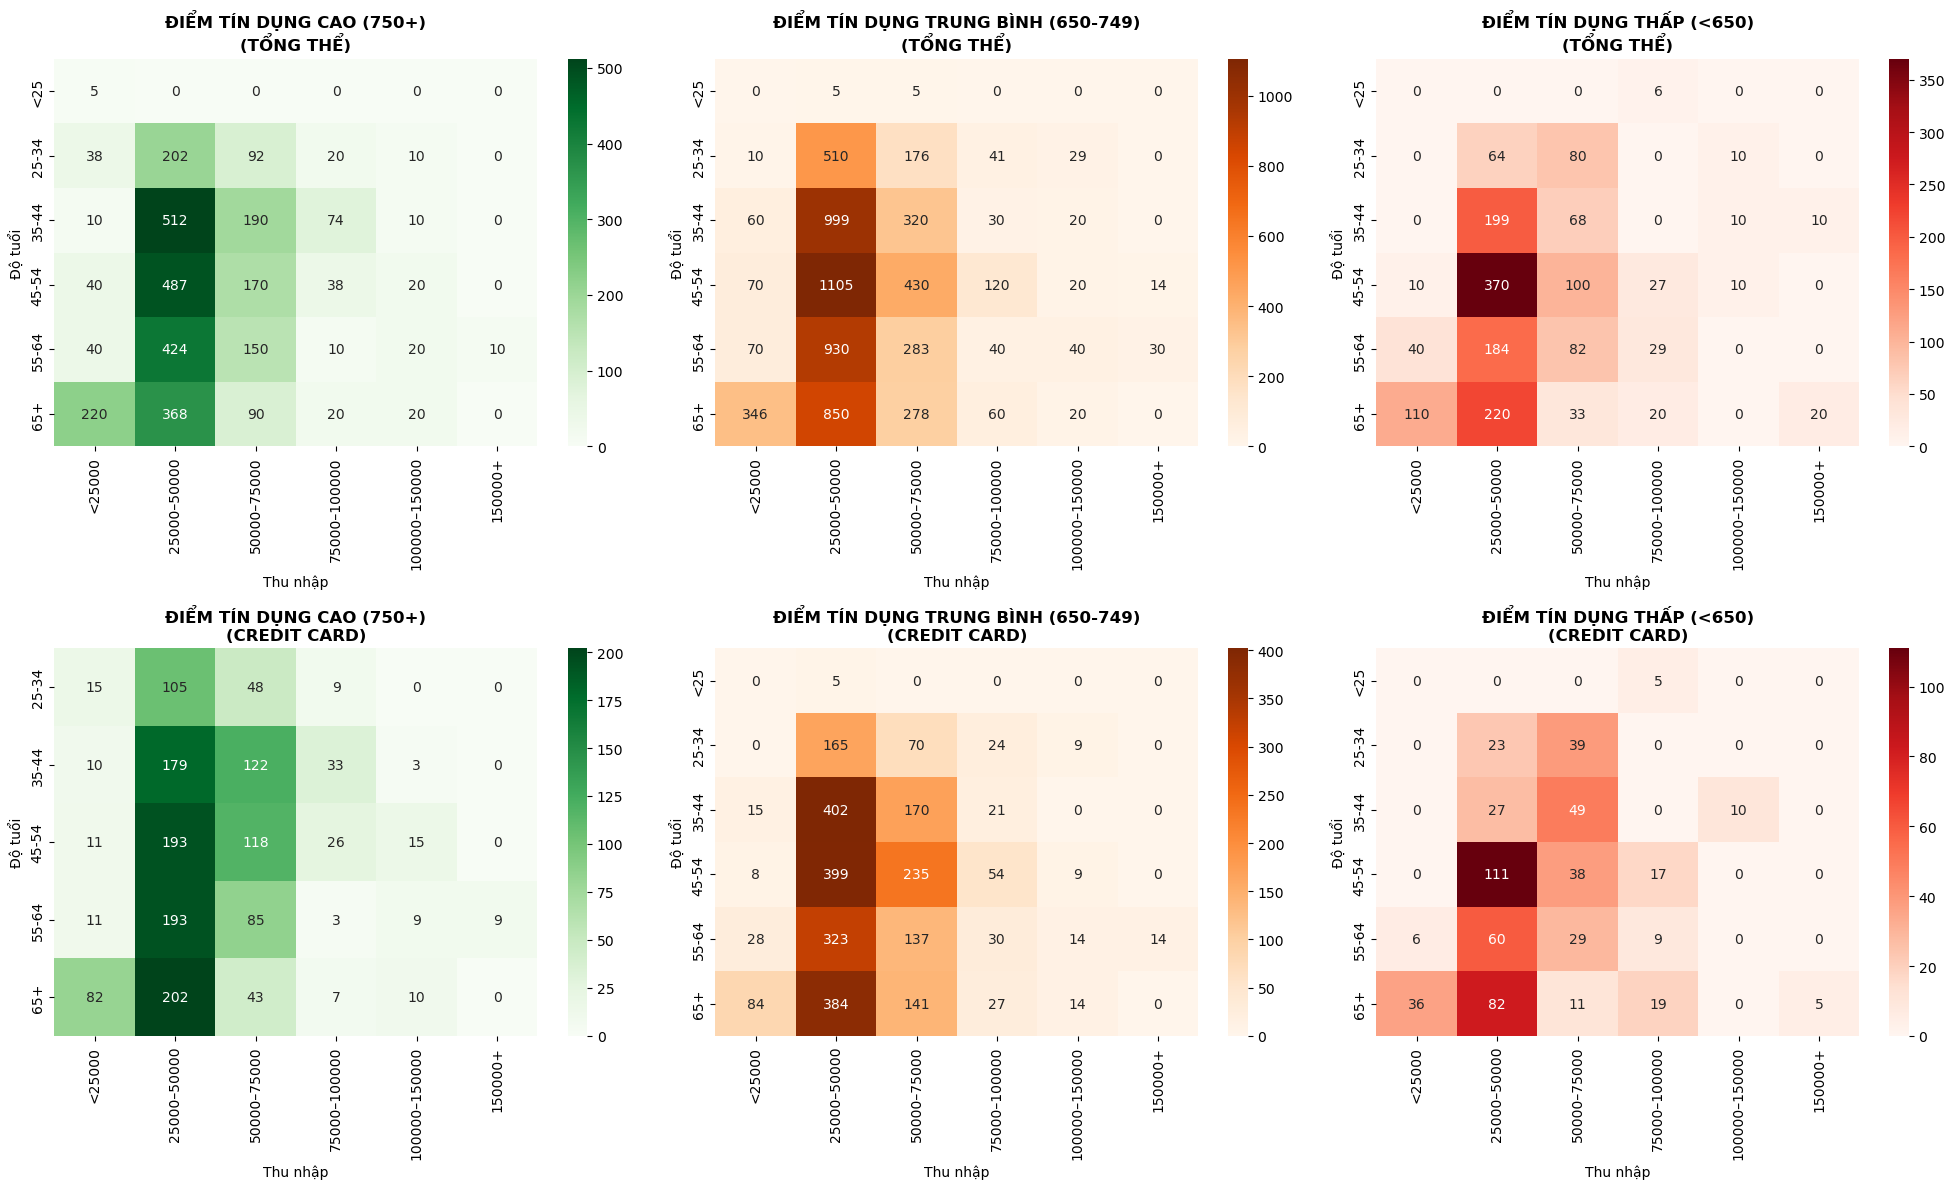

In [545]:
# Tạo nhóm điểm tín dụng
def categorize_credit_score(score):
    if score >= 750:
        return 'Cao (750+)'
    elif score >= 650:
        return 'Trung bình (650-749)'
    else:
        return 'Thấp (<650)'

# Áp dụng cho cả hai dataset
final_client_df['credit_score_group'] = final_client_df['credit_score'].apply(categorize_credit_score)
credit_card_users['credit_score_group'] = credit_card_users['credit_score'].apply(categorize_credit_score)

print("SO SÁNH TỔNG THỂ vs CREDIT CARD USERS")
print("=" * 50)
print(f"Tổng số khách hàng: {len(final_client_df):,}")
print(f"Số credit card users: {len(credit_card_users):,}")
print(f"Tỷ lệ credit card users: {len(credit_card_users)/len(final_client_df)*100:.1f}%")
print("\n")

# 2. SO SÁNH PHÂN BỐ ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI VÀ THU NHẬP
plt.figure(figsize=(20, 12))

# Tổng thể - Điểm tín dụng Cao
plt.subplot(2, 3, 1)
high_credit_all = final_client_df[final_client_df['credit_score_group'] == 'Cao (750+)']
age_income_high_all = pd.crosstab(high_credit_all['age_group'], high_credit_all['yearly_income'])
sns.heatmap(age_income_high_all, annot=True, cmap='Greens', fmt='d')
plt.title('ĐIỂM TÍN DỤNG CAO (750+)\n(TỔNG THỂ)', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Tổng thể - Điểm tín dụng Trung bình
plt.subplot(2, 3, 2)
medium_credit_all = final_client_df[final_client_df['credit_score_group'] == 'Trung bình (650-749)']
age_income_medium_all = pd.crosstab(medium_credit_all['age_group'], medium_credit_all['yearly_income'])
sns.heatmap(age_income_medium_all, annot=True, cmap='Oranges', fmt='d')
plt.title('ĐIỂM TÍN DỤNG TRUNG BÌNH (650-749)\n(TỔNG THỂ)', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Tổng thể - Điểm tín dụng Thấp
plt.subplot(2, 3, 3)
low_credit_all = final_client_df[final_client_df['credit_score_group'] == 'Thấp (<650)']
age_income_low_all = pd.crosstab(low_credit_all['age_group'], low_credit_all['yearly_income'])
sns.heatmap(age_income_low_all, annot=True, cmap='Reds', fmt='d')
plt.title('ĐIỂM TÍN DỤNG THẤP (<650)\n(TỔNG THỂ)', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Credit Card Users - Điểm tín dụng Cao
plt.subplot(2, 3, 4)
high_credit_credit = credit_card_users[credit_card_users['credit_score_group'] == 'Cao (750+)']
age_income_high_credit = pd.crosstab(high_credit_credit['age_group'], high_credit_credit['yearly_income'])
sns.heatmap(age_income_high_credit, annot=True, cmap='Greens', fmt='d')
plt.title('ĐIỂM TÍN DỤNG CAO (750+)\n(CREDIT CARD)', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Credit Card Users - Điểm tín dụng Trung bình
plt.subplot(2, 3, 5)
medium_credit_credit = credit_card_users[credit_card_users['credit_score_group'] == 'Trung bình (650-749)']
age_income_medium_credit = pd.crosstab(medium_credit_credit['age_group'], medium_credit_credit['yearly_income'])
sns.heatmap(age_income_medium_credit, annot=True, cmap='Oranges', fmt='d')
plt.title('ĐIỂM TÍN DỤNG TRUNG BÌNH (650-749)\n(CREDIT CARD)', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Credit Card Users - Điểm tín dụng Thấp
plt.subplot(2, 3, 6)
low_credit_credit = credit_card_users[credit_card_users['credit_score_group'] == 'Thấp (<650)']
age_income_low_credit = pd.crosstab(low_credit_credit['age_group'], low_credit_credit['yearly_income'])
sns.heatmap(age_income_low_credit, annot=True, cmap='Reds', fmt='d')
plt.title('ĐIỂM TÍN DỤNG THẤP (<650)\n(CREDIT CARD)', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

plt.tight_layout()
plt.show()


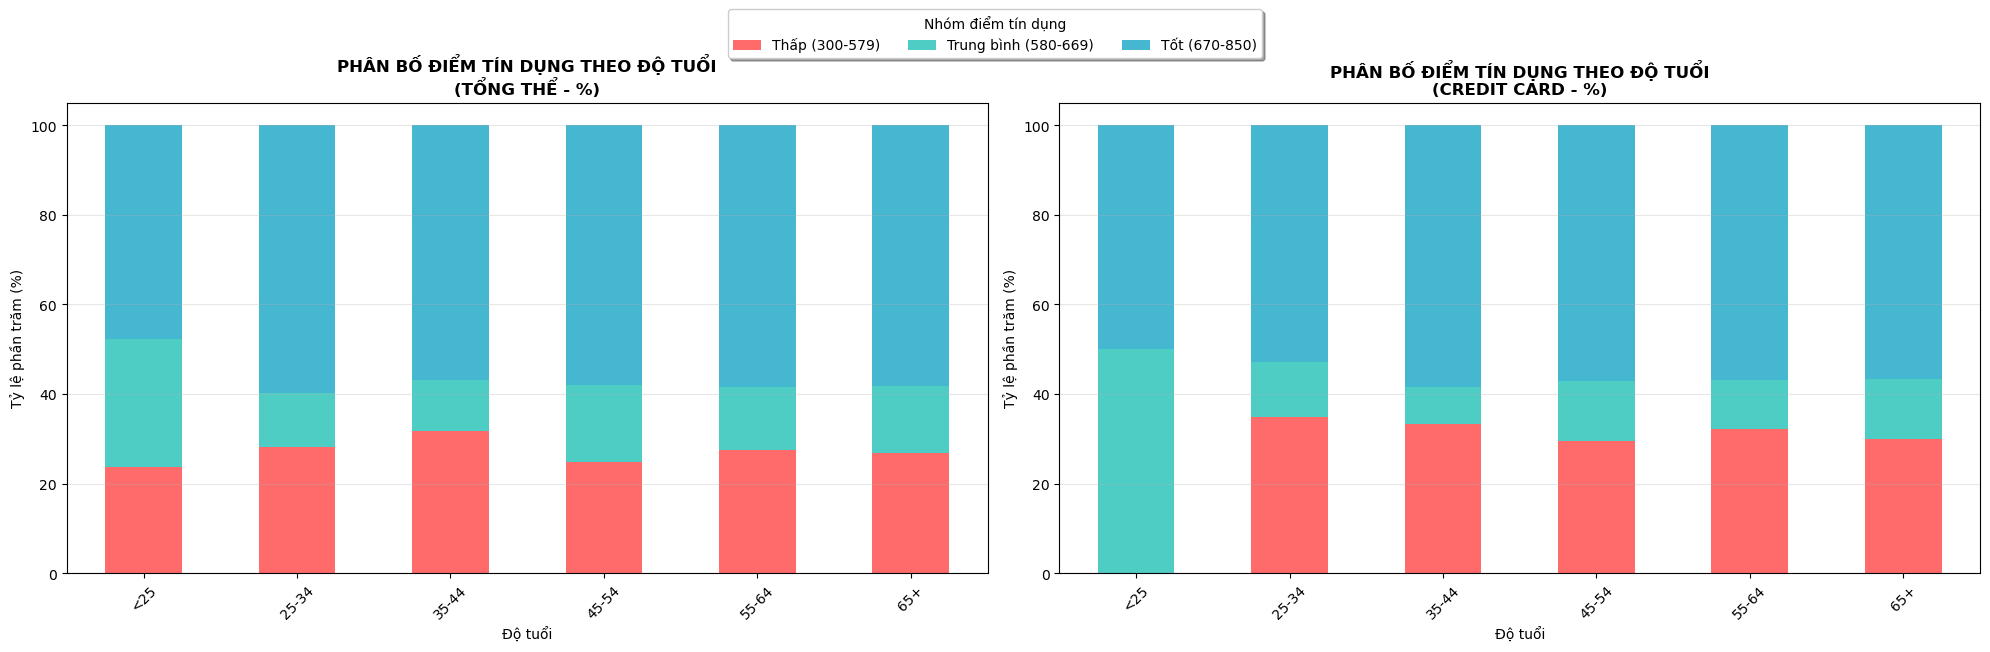

In [549]:
# 3. SO SÁNH PHÂN BỐ ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI
plt.figure(figsize=(20, 12))

# Định nghĩa màu sắc và nhãn chung cho tất cả biểu đồ
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
legend_labels = ['Thấp (300-579)', 'Trung bình (580-669)', 'Tốt (670-850)']

# Phân bố điểm tín dụng theo độ tuổi - Tổng thể
plt.subplot(2, 2, 1)
credit_age_all = pd.crosstab(final_client_df['age_group'], final_client_df['credit_score_group'])
credit_age_all_percent = credit_age_all.div(credit_age_all.sum(axis=1), axis=0) * 100
credit_age_all_percent.plot(kind='bar', stacked=True, ax=plt.gca(), 
                           color=colors, legend=False)  # THÊM legend=False Ở ĐÂY
plt.title('PHÂN BỐ ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI\n(TỔNG THỂ - %)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Phân bố điểm tín dụng theo độ tuổi - Credit Card
plt.subplot(2, 2, 2)
credit_age_credit = pd.crosstab(credit_card_users['age_group'], credit_card_users['credit_score_group'])
credit_age_credit_percent = credit_age_credit.div(credit_age_credit.sum(axis=1), axis=0) * 100
credit_age_credit_percent.plot(kind='bar', stacked=True, ax=plt.gca(), 
                              color=colors, legend=False)  # THÊM legend=False Ở ĐÂY
plt.title('PHÂN BỐ ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI\n(CREDIT CARD - %)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Tạo chú thích chung cho cả 2 biểu đồ
plt.figlegend(handles=[plt.Rectangle((0,0),1,1, fc=color) for color in colors],
            labels=legend_labels,
            title='Nhóm điểm tín dụng',
            loc='upper center',
            bbox_to_anchor=(0.5, 0.95),
            ncol=3,
            fontsize=10,
            frameon=True,
            fancybox=True,
            shadow=True)

plt.tight_layout(rect=[0, 0, 1, 0.92])  # Điều chỉnh layout để chừa chỗ cho legend
plt.show()

Số lượng khách hàng dùng credit card: 4,899
Tỷ lệ: 41.2% tổng số khách hàng




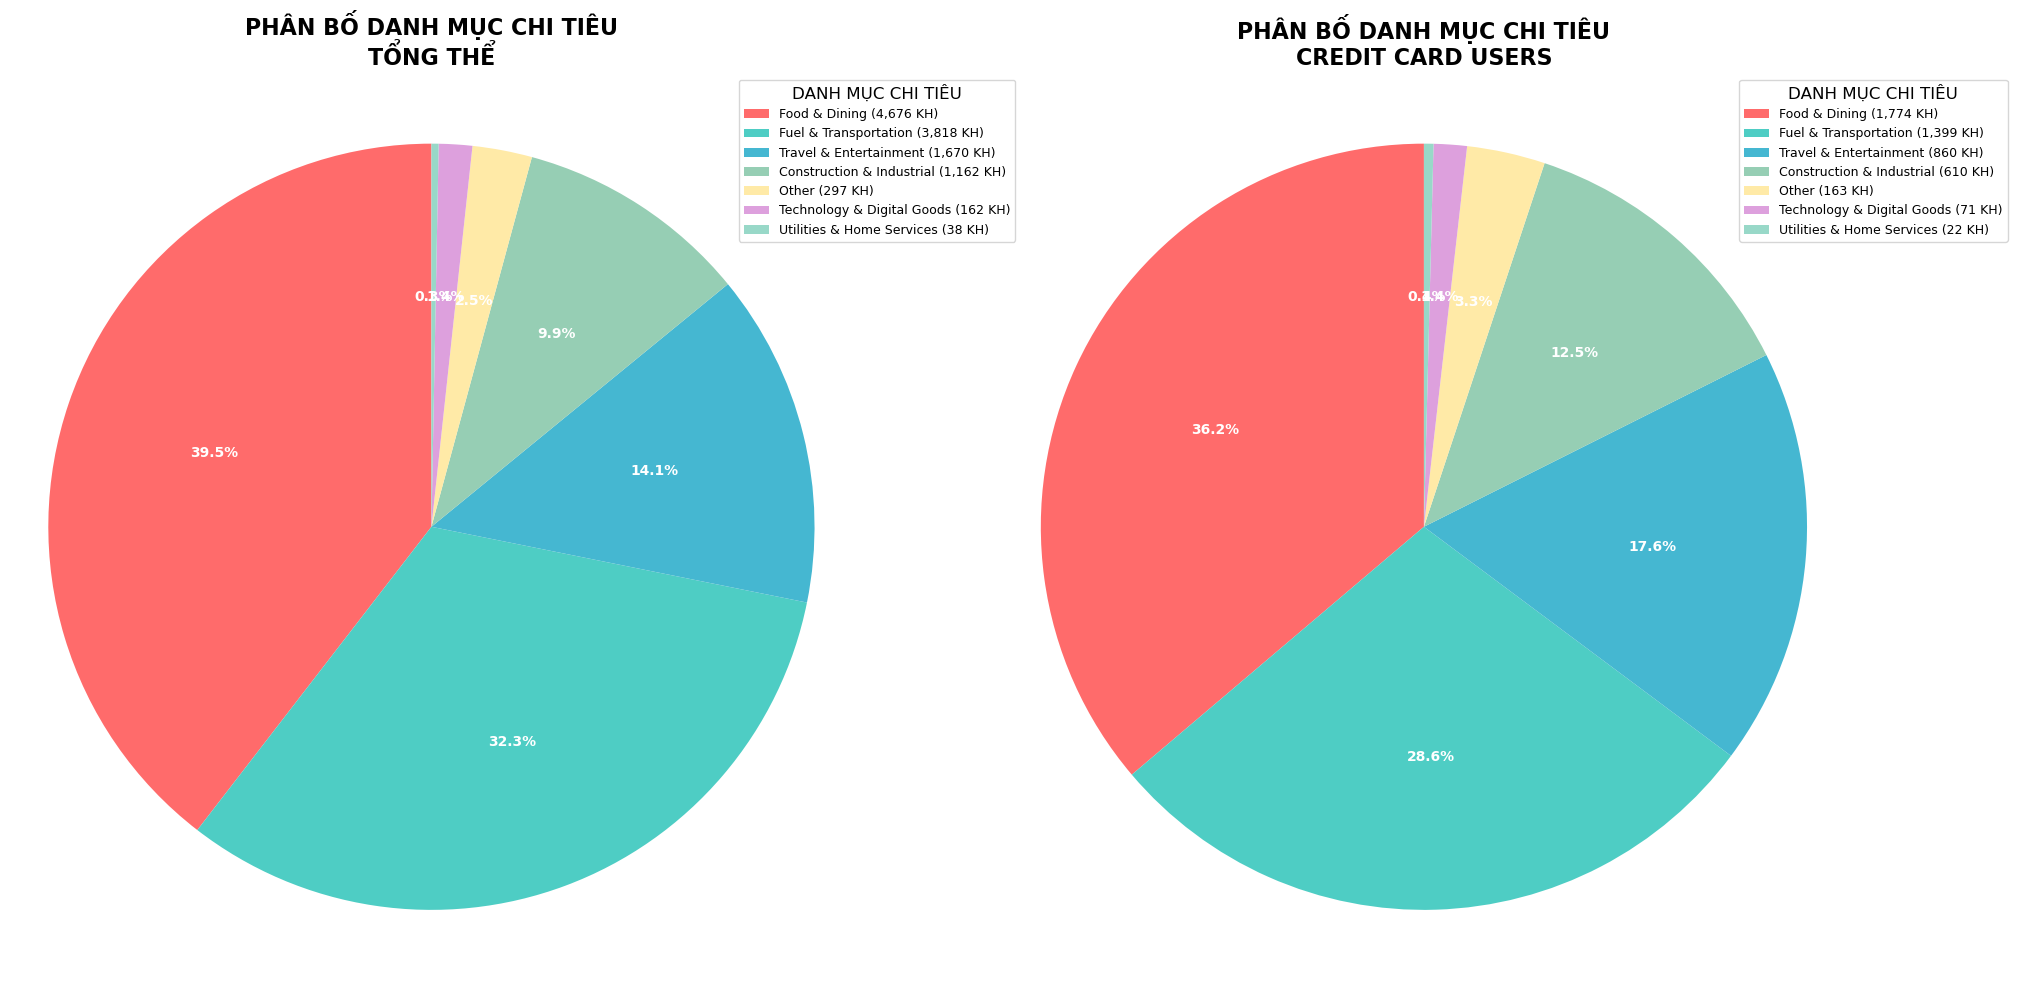

In [ ]:
print(f"Số lượng khách hàng dùng credit card: {len(credit_card_users):,}")
print(f"Tỷ lệ: {len(credit_card_users)/len(final_client_df)*100:.1f}% tổng số khách hàng")
print("\n")

# SO SÁNH PHÂN BỐ DANH MỤC CHI TIÊU - TỔNG THỂ vs CREDIT CARD
plt.figure(figsize=(20, 10))

# Tính toán phần trăm cho cả hai nhóm
category_counts_all = final_client_df['top_category'].value_counts()
category_percent_all = (category_counts_all / len(final_client_df) * 100).round(1)

category_counts_credit = credit_card_users['top_category'].value_counts()
category_percent_credit = (category_counts_credit / len(credit_card_users) * 100).round(1)

# Màu sắc thống nhất cho cả hai pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

# Pie Chart 1: Tổng thể
plt.subplot(1, 2, 1)
wedges1, texts1, autotexts1 = plt.pie(category_percent_all.values, 
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

# Làm đẹp phần trăm bên trong
for autotext in autotexts1:
    autotext.set_color('white')

# Tạo chú thích
legend_labels1 = [f'{category} ({count:,} KH)' for category, count in category_counts_all.items()]
plt.legend(wedges1, legend_labels1, 
           title="DANH MỤC CHI TIÊU",
           title_fontsize=12,
           loc="upper right",
           bbox_to_anchor=(1.2, 1.0),
           fontsize=9)

plt.title('PHÂN BỐ DANH MỤC CHI TIÊU\nTỔNG THỂ', fontsize=16, fontweight='bold')
plt.axis('equal')

# Pie Chart 2: Credit Card Users
plt.subplot(1, 2, 2)
wedges2, texts2, autotexts2 = plt.pie(category_percent_credit.values, 
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

# Làm đẹp phần trăm bên trong
for autotext in autotexts2:
    autotext.set_color('white')

# Tạo chú thích
legend_labels2 = [f'{category} ({count:,} KH)' for category, count in category_counts_credit.items()]
plt.legend(wedges2, legend_labels2, 
           title="DANH MỤC CHI TIÊU",
           title_fontsize=12,
           loc="upper right",
           bbox_to_anchor=(1.2, 1.0),
           fontsize=9)

plt.title('PHÂN BỐ DANH MỤC CHI TIÊU\nCREDIT CARD USERS', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

TOP 3 CATEGORY LỚN NHẤT CHO CREDIT CARD USERS:
1. Food & Dining: 1,774 khách hàng (36.2%)
2. Fuel & Transportation: 1,399 khách hàng (28.6%)
3. Travel & Entertainment: 860 khách hàng (17.6%)


CHI TIÊU TRUNG BÌNH THEO ĐỘ TUỔI VÀ CATEGORY:
top_category  Food & Dining  Fuel & Transportation  Travel & Entertainment
age_group                                                                 
<25                 6804.71                5347.00                    0.00
25-34               4896.14                4847.01                 4121.95
35-44               6237.89                6354.86                 4349.45
45-54               5670.44                6058.37                 4168.34
55-64               4947.58                4942.78                 4345.52
65+                 6232.50                5803.60                 4484.00




/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_52605/427551103.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_spent = top3_data.groupby(['age_group', 'top_category'])['total_spent'].mean().unstack()


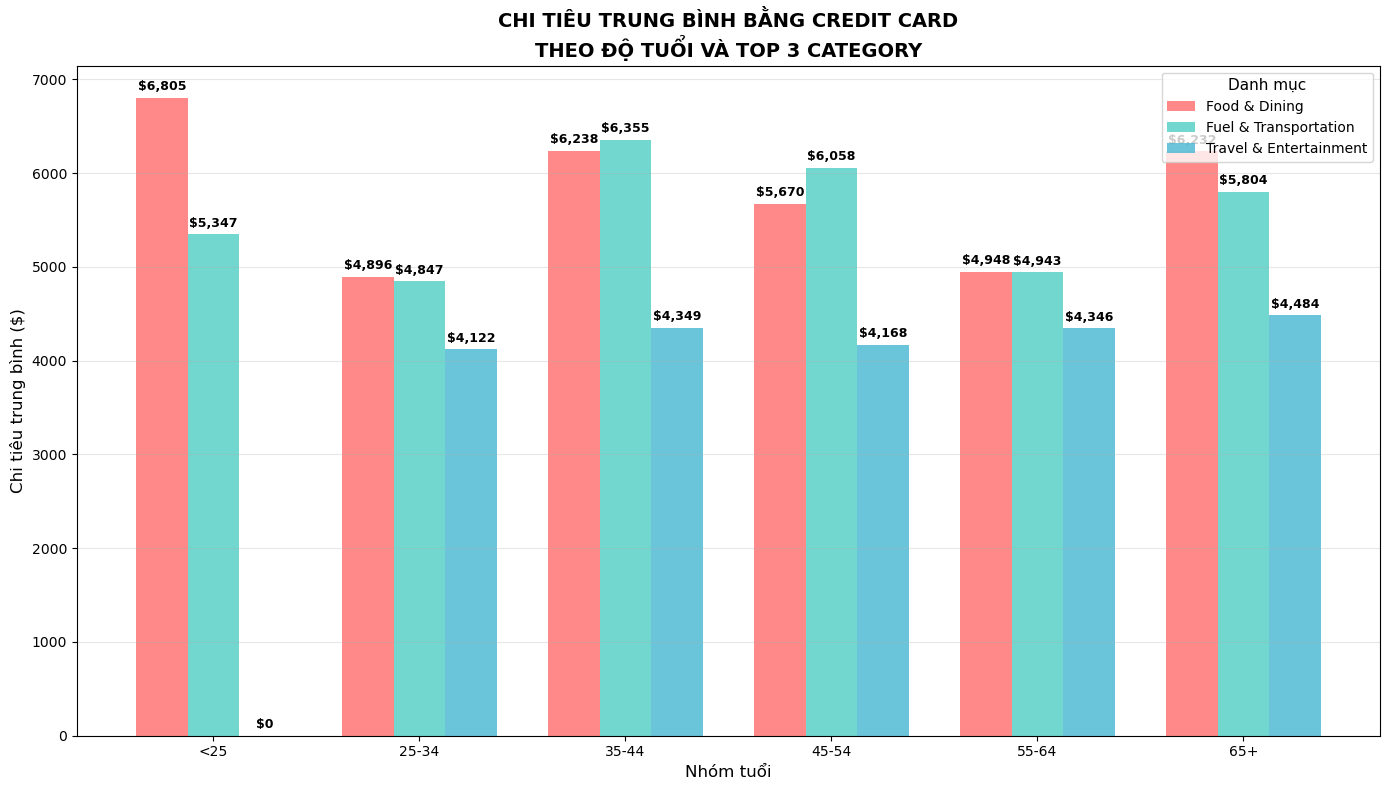

In [ ]:
# Tìm top 3 category lớn nhất trong credit card users
top3_categories = credit_card_users['top_category'].value_counts().head(3).index.tolist()
print(f"TOP 3 CATEGORY LỚN NHẤT CHO CREDIT CARD USERS:")
for i, category in enumerate(top3_categories, 1):
    count = credit_card_users[credit_card_users['top_category'] == category].shape[0]
    percent = (count / len(credit_card_users)) * 100
    print(f"{i}. {category}: {count:,} khách hàng ({percent:.1f}%)")

print("\n")

# Lọc chỉ top 3 category
top3_data = credit_card_users[credit_card_users['top_category'].isin(top3_categories)]

# Tính chi tiêu trung bình theo độ tuổi và category
age_category_spent = top3_data.groupby(['age_group', 'top_category'])['total_spent'].mean().unstack()

# SỬA LỖI: Điền giá trị 0 cho các ô NaN
age_category_spent = age_category_spent.fillna(0)

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))

# Biểu đồ cột grouped
x = np.arange(len(age_category_spent.index))
width = 0.25

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, category in enumerate(top3_categories):
    plt.bar(x + i*width - width, age_category_spent[category], width, 
            label=category, color=colors[i], alpha=0.8)

plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Chi tiêu trung bình ($)', fontsize=12)
plt.title('CHI TIÊU TRUNG BÌNH BẰNG CREDIT CARD\nTHEO ĐỘ TUỔI VÀ TOP 3 CATEGORY', 
          fontsize=14, fontweight='bold')
plt.xticks(x, age_category_spent.index)
plt.legend(title='Danh mục', title_fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for i, age_group in enumerate(age_category_spent.index):
    for j, category in enumerate(top3_categories):
        value = age_category_spent.loc[age_group, category]
        plt.text(i + j*width - width, value + 50, f'${value:,.0f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

